In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


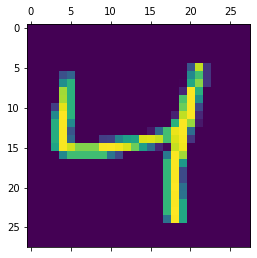

In [20]:
plt.matshow(X_train[2])


In [21]:
X_train = X_train/255
X_test = X_test/255


In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2668 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1188 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0819 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0632 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9848


In [23]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0796 - accuracy: 0.9745


[0.07957819104194641, 0.9745000004768372]

In [24]:
model.predict(X_test)


array([[3.6426366e-03, 5.8748927e-05, 1.3327199e-01, ..., 9.9995780e-01,
        8.8425139e-03, 2.0799652e-01],
       [2.2107422e-04, 9.8372722e-01, 9.9999964e-01, ..., 1.9371419e-06,
        8.4850526e-01, 4.3394039e-07],
       [5.5478042e-04, 9.9769503e-01, 5.9106033e-02, ..., 1.1086530e-01,
        9.5404387e-02, 6.9813622e-04],
       ...,
       [2.0639918e-07, 6.0058588e-05, 4.1675960e-07, ..., 1.1206320e-01,
        7.1806505e-02, 9.7593737e-01],
       [5.8832965e-03, 1.0779481e-03, 1.6916088e-04, ..., 1.6032461e-04,
        4.3227056e-01, 4.6859168e-05],
       [3.5003899e-03, 2.0431974e-03, 3.2103490e-03, ..., 1.9673658e-05,
        7.0173919e-05, 3.3782620e-05]], dtype=float32)

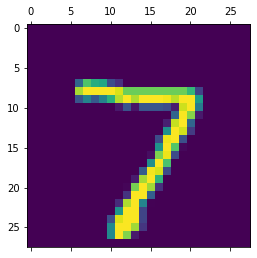

In [25]:
plt.matshow(X_test[0])


In [26]:
y_predicted = model.predict(X_test)
y_predicted[1]


array([2.2107422e-04, 9.8372722e-01, 9.9999964e-01, 9.6791136e-01,
       2.1171025e-10, 4.1886663e-01, 1.1082873e-01, 1.9371419e-06,
       8.4850526e-01, 4.3394039e-07], dtype=float32)

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [28]:
y_test[:5]


array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    1,    3,    4,    3,    2,    1,    1],
       [   0, 1125,    1,    1,    0,    1,    5,    0,    2,    0],
       [   4,    5,  998,    4,    3,    3,    2,    6,    7,    0],
       [   0,    0,    2,  981,    1,   13,    0,    4,    3,    6],
       [   2,    0,    1,    1,  967,    0,    6,    1,    1,    3],
       [   2,    1,    0,    5,    2,  874,    4,    1,    1,    2],
       [   3,    2,    1,    1,    7,    2,  941,    0,    1,    0],
       [   1,    5,    8,    3,    4,    0,    0, 1001,    0,    6],
       [   7,    0,    2,    8,    5,   11,    5,    3,  931,    2],
       [   2,    5,    0,    6,   15,   10,    1,    6,    2,  962]])>

Text(69.0, 0.5, 'Truth')

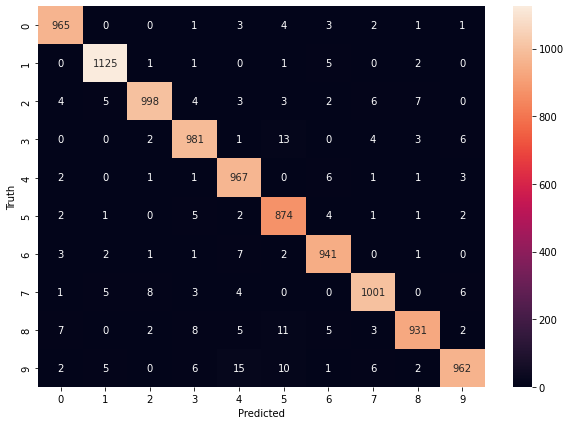

In [30]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
